<a href="https://colab.research.google.com/github/JoaoM-py/Machine-Learning/blob/main/CondimentosIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Pandas
import pandas as pd

# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Sklearn e Skforecast
from sklearn.ensemble import RandomForestRegressor

!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
url = 'https://raw.githubusercontent.com/JoaoM-py/Machine-Learning/main/india.csv'
data = pd.read_csv(url, sep=',')
data.head(5)

,date,Chickpeas,Oil (mustard),Potatoes,Rice,Sugar,Wheat,Onions
0,2000-02,18.896667,45.690000,4.933333,236.494444,16.270588,205.003846,5.246667
1,2000-03,18.160000,43.621875,4.365000,223.215789,16.613889,245.025000,5.680000
2,2000-04,18.500000,42.965625,4.742500,231.990556,17.041667,234.041429,5.487500
3,2000-05,18.295000,41.340625,4.855000,231.355556,16.641667,219.606667,5.257500
4,2000-06,18.840000,42.080000,5.090000,230.888889,16.635294,217.806667,4.827500


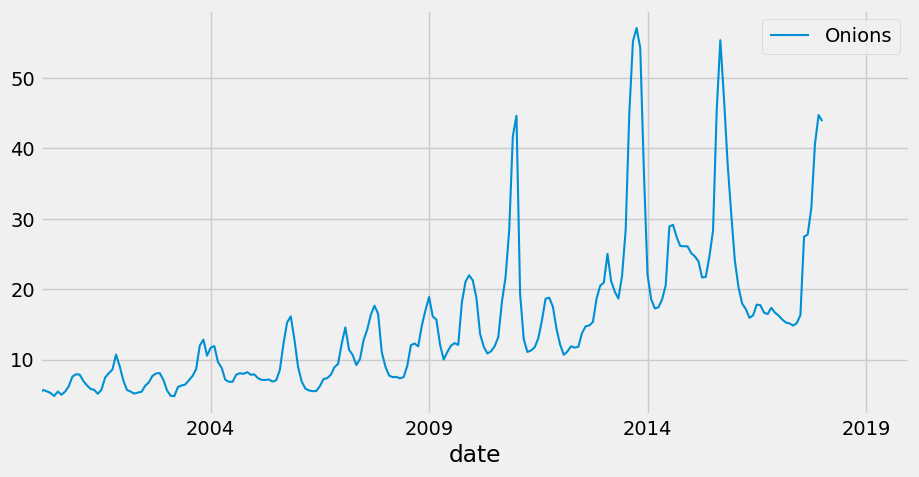

In [34]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
data = data.set_index('date')
data = data.asfreq('MS', fill_value=0.0)
data = data.sort_index()


fig, ax = plt.subplots(figsize=(10, 5))
data['Onions'].plot(ax=ax, label='Onions')
ax.legend();

In [35]:
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.14166666666666666


In [36]:
(data.index == pd.date_range(start=data.index.min(),
                             end=data.index.max(),
                             freq=data.index.freq)).all()

True

In [37]:
data = data.dropna()

In [38]:
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


Train dates : 2000-02-01 00:00:00 --- 2015-01-01 00:00:00  (n=170)
Test dates  : 2015-02-01 00:00:00 --- 2018-01-01 00:00:00  (n=36)


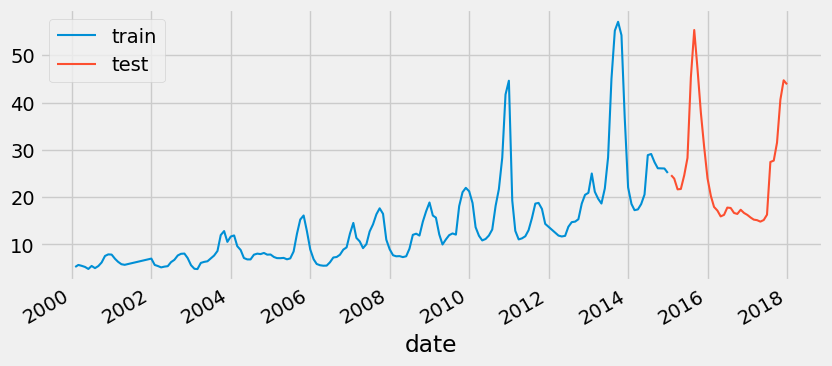

In [39]:
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4))
data_train['Onions'].plot(ax=ax, label='train')
data_test['Onions'].plot(ax=ax, label='test')
ax.legend();